In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt

import Module as mod

In [3]:
import plt_conf as conf
conf.general()  # cargando configuración general

A continuación apliquemos lo anteriormente visto a un sistema que describe un movimiento ondulatorio, p.ej. señales se propagan a través de un medio en el espacio y el tiempo. Muchos tipos de movimiento ondulatorio pueden describirse mediante la ecuación diferencial 
$$
u_{tt} = \nabla \cdot (c^2 \nabla u) + f
$$

### Simulación de ondas en una cuerda

Consideremos el caso de ondas unidimensionales en una cuerda, por ejemplo, en una guitarra. Supongamos que la cuerda en estado deformado coincide con el intervalo $[0, L]$ a lo largo del eje $x$, y $u(x, t)$ representa el desplazamiento en el tiempo $t$ en la dirección $x$ con una velocidad $c$ desde un punto inicialmente $x_0$. La función de desplazamiento $u$ está determinada por el modelo matemático (ecuación de onda uni-dimensional)
$$
\frac{\partial^2 u}{\partial t^2}=c^2\frac{\partial^2 u}{\partial x^2}, \qquad x\in(0, L), t\in(0, T]
$$

Como la ecuación diferencial es de segundo orden, tanto en el tiempo, como en el espacio necesitamos dos condiciones iniciales las cuales especifícan la forma de la cuerda y la velocidad inicial de la misma:
$$
u(x, 0)=I(x), \quad \frac{\partial}{\partial t}u(x, 0)=0, \qquad x\in[0, L],
$$
y dos condiciones de fronteras las cuales definiremos acorde a una cuerda con los extremos fijos (el desplazamiento de $u$ es cero):
$$
u(0, t)=0, \quad u(L, t)=0, \qquad t\in(0, T].
$$


### Discretizando el dominio

Para la resolución del problema tenemos que discretizar nuestro dominio temporal $[0, T]$ y espacial $[0, L]$, es decir:
$$
0=t_0<t_1< t_2< \dots < t_{N_t-1} < t_{N_t}=T, \qquad 0=x_0<x_1< x_2< \dots < x_{N_x-1} < t_{N_x}=L,
$$ 

lo que nos lleva a construir una *malla* bidimensional correspondiente al plano $x, t$, cuyas cordenadas serían $(x_i, t_n)$, con $i=0,\dots, N_x$ y $n=0,\dots, N_t$.

**IMPLEMENTACION:** $x_i = x_0 + i\triangle x, \quad t_n = t_0 + n \triangle t$ donde $\triangle x, \triangle t$ representan el ancho de las mallas espaciales y temporales respectivamente.

### Discretizando la solución

Tendremos que la solución $u(x, t)$ estará discretizada, es decir, evaluada en la malla $2D$. Por simplicidad es usual introducir la notación $u_{i}^{n}$ para indicar la solución aproximada en el punto $(x_i, t_n)$.

### Discretizando la ecuación diferencial

A continuación procederemos a discretizar el ecuación diferencial 

$$
\frac{\partial^2 u}{\partial t^2}=c^2\frac{\partial^2 u}{\partial x^2},
$$

para ello remplazaremos la segunda derivada por su aproximación de segundo orden de la diferencia central
$$
\frac{\partial^2}{\partial t^2}u(x_i, t_n)\approx \frac{u_{i}^{n+1}-2u_{i}^{n}+u_{i}^{n-1}}{\triangle t^2}=[D_tD_t u]^{n}_{i}.
$$

Finalmente tendremos que:
\begin{align}
\frac{u_{i}^{n+1}-2u_{i}^{n}+u_{i}^{n-1}}{\triangle t^2}&=c^2 \frac{u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n}}{\triangle x^2},\\
[D_tD_t u &= c^2 D_xD_x u]^{n}_{i}.
\end{align}

Interpretemos nuestra discretización. Como se aprecia el valor de $u_i^{n}$ dependerá del valor de sus vecinos $u_i^{n\pm 1}$ y $u_{i\pm 1}^{n}$ como se ilustra en la figura

<img src="Imagenes/fig1.png">

Ahora nuestro objetivo es encontrar $u_{i}^{n+1}$, es decir evolucionar en el tiempo toda la malla espacial, para ello debemos despejar este término en la versión discreta de la ecuación diferencial, quedando 
$$
u_{i}^{n+1} =  -u_{i}^{n-1}+2u_{i}^{n}+C^2(u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n}),
$$

donde $C=c\frac{\triangle t}{\triangle x}$ y es conocido como el numero de Courant. El cual no es más que el parámetro que discretiza la ecuación de onda.

#### Condiciones de iniciales y de frontera

De manera similar debemos discretizar nuestra condición inicial: $\frac{\partial}{\partial t}u(x, 0)=0$. Para ello tomamos la aproximación para la primera derivada de la diferencia central:
$$
\frac{\partial}{\partial t} u(x_i, t_0)\approx \frac{u_i^{1}-u_i^{-1}}{2\triangle t}=[D_{2t}u]^{0}_{i}=0,
$$
de donde tendremos que $u_i^{-1}=u_i^{1}$. La otra condición inicial nos lleva a $u_{i}^{0}=I(x_i)$ para $i=0,\dots, N_x$.

De las condiciones de frontera tendremos que $u_{0}^{n}=u_{N_x}^{n}=0$ (extremos fijos).

#### Primer paso de iteración (n=0)
Veamos ahora como sería el primer paso de iteración en el tiempo $n=0$:
$$
u_{i}^{1} = -u_{i}^{-1}+2u_{i}^{0}+C^2(u_{i+1}^{0}-2u_{i}^{0}+u_{i-1}^{0}),
$$

Notan algo raro? Necesitamos computar $u_{i}^{-1}$.

Usando la relación obtenida anteriormente ($u_i^{-1}=u_i^{1}$), podemos obtener la expresión para el primer paso de iteración:
$$
u_{i}^{1} = u_{i}^{0}+\frac{C^2}{2}(u_{i+1}^{0}-2u_{i}^{0}+u_{i-1}^{0}).
$$

Esquemáticamente lo que tendriamos sería

<img src="Imagenes/fig2.png">

Finalmente resumamos nuestro esquema de iteración:
- Calculamos $u_i^{0}=I(x_i)$ para $i=0,\dots, N_x$,
- Calculamos $u_i^{1}$ mediante:
$$
u_{i}^{1} = u_{i}^{0}+\frac{C^2}{2}(u_{i+1}^{0}-2u_{i}^{0}+u_{i-1}^{0}).
$$
fijando $u_i^{1}=0$ para los puntos de la frontera $i=0, N_x$ para todo $n=1,\dots, N_t-1$.
- Para cada paso de iteración temporal $n=1, 2,\dots, N_t-1$ realizamos los siguientes pasos:
    - Calculamos $u_{i}^{n+1}$ para todas las $i=1, \dots, N_x-1$
    $$
    u_{i}^{n+1} =  -u_{i}^{n-1}+2u_{i}^{n}+C^2(u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n}),
    $$
    - Fijamos $u_i^{n+1}=0$ para los puntos de la frontera  $i=0, N_x$.

En resumen este algoritmo esencialmente consiste en recorrer mediante diferencias finitas toda la malla 2D.

#### Generalización

El modelo matemático anterior puede generalizarce con la inclusión de un término fuente, es decir, un generador de la onda.
\begin{align}
u_{tt}&=c^2 u_{xx}+f(x, t), \qquad x\in(0, L), t\in(0,T],\\
u(x, 0)&=I(x), \qquad x\in [0, L],\\
u_t(x, 0)& = V(x), \qquad x\in [0, L],\\
u(0, t)&=0, \qquad t>0,\\
u(L, t)&=0, \qquad t>0.
\end{align}

Usando la notación anteriormente vista tendremos que:
$$
[D_tD_tu=c^2D_xD_x u+f]_i^{n}.
$$

Resolviendo para $u_i^{n+1}$ tendremos:
\begin{align}\begin{aligned}\tag{6}
u^{n+1}_i = -u^{n-1}_i + 2u^n_i + C^2
    (u^{n}_{i+1}-2u^{n}_{i} + u^{n}_{i-1}) + \Delta t^2 f^n_i.\\    {\thinspace}\end{aligned}\end{align}

Similar al caso anterior, debemos obtener la expresión para el primer paso de iteración en el tiempo, para ello discretizamos la condición inicial $u_t=V(x)$ en $t=0$,
\begin{align}
[D_{2t}u = V]^0_i\quad\Rightarrow\quad u^{-1}_i = u^{1}_i - 2\Delta t V_i,
\end{align}

Lo cual nos lleva a:
\begin{align}\begin{aligned}\tag{183}
u^{1}_i = u^0_i + \Delta t V_i + {\frac{1}{2}} C^2 \left(u^{0}_{i+1}-2u^{0}_{i} + u^{0}_{i-1}\right) + \frac{1}{2}\Delta t^2 f^0_i {\thinspace .}\end{aligned}\end{align}

In [6]:
# EJEMPLOS

# Ejemplo 1
# Definiendo las condiciones de frontera u(0, t)=u(L,t)=0 
# y tomando f=2(1+t)c^2 tendremos que una solución analítica de la forma: u(x, t) = x(L-x)(1+t/2)
# Donde tendremos como condiciones iniciales u(x,0)=I(x)=x(L-x), u_t(x, 0)=V(x)=x(L-x)/2

#  c, I(x), V(x), f(x,t), L, and T
def test_quadratic(xlim, tmax, utilez, ZipName='SimulacionData'):
    """
    Solución analítica: u(x,t)=x(L-x)(1+t/2)
    """
    x0, xmax = xlim
    Nx, c, C = utilez

    dt = C*(xmax/Nx)/c

    # solución exacta:
    u_exact = lambda x, t, xmax: x*(xmax-x)*(1 + 0.5*t)

    # fuente
    f = lambda x, t: (2 + t)*c**2

    # condicion de frontera
    I = lambda x: u_exact(x, x0, xmax)
    V = lambda x: 0.5*u_exact(x, 0, xmax)

    # resolviendo
    u, xi, ti, cpu_time = mod.solver(I, xmax, tmax, dt, C, c=c, f=f, V=V, ZipName=ZipName)
    return u, xi, ti, cpu_time

In [12]:
tmax = 18
x0, xmax = 0, 2.5
c = 1.5; C = 0.75; Nx = 60
xlim = [x0, xmax]
utilez = [Nx, c, C]
nameZip = 'SimulacionData'
u, xi, ti, cpu_time = test_quadratic(xlim, tmax, utilez, ZipName=nameZip)

/var/folders/mf/vfyq6zyn4l35gfd2kgq4k2q00000gn/T/ipykernel_62008/3479587132.py:2: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  figData = plt.subplots(nrows=1, ncols=1, figsize=(5, 4), sharex=False, sharey=False, gridspec_kw=dict(hspace=0.0, wspace=.13))


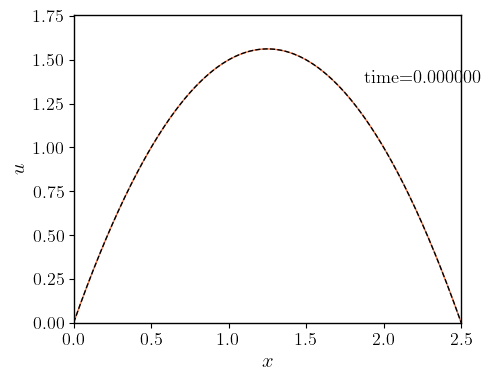

In [8]:
address = 'Data/'+nameZip+'.npz'
figData = plt.subplots(nrows=1, ncols=1, figsize=(5, 4), sharex=False, sharey=False, gridspec_kw=dict(hspace=0.0, wspace=.13))
dvideo = mod.Visualization(address, figData)

n0 = 0
dataname = '.data'
nameV = 'video_quadratic'
xmin, xmax, ls, lw, color = xi[0], xi[-1], '-', 1, '#f0784d'
struc = [xmin, xmax, ls, lw, color]

Sol_exact = lambda x, t: x*(xmax-x)*(1 + 0.5*t)
dvideo.video(n0, dataname, struc, nameV, solEx=Sol_exact, show=False)

In [24]:
# Ejemplo 2
def guitar(xlim, utilez, mu, sig, C=1, ZipName='SimulacionData'):
    """Gauss wave (pulled guitar string)."""

    x0, xmax = xlim
    Nx, a0, wavelength, freq, num_periods = utilez
    
    c = freq*wavelength
    omega = 2*np.pi*freq
    tmax = 2*np.pi/omega*num_periods
    dt = C*(xmax/Nx)/c

    # fuente
    f = lambda x, t: 0

    def gaussian(x, mu, sig, a0):
        return a0/(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)

    def I(x):
        Ixi = gaussian(x, mu, sig, a0)
        return Ixi

    u, xi, ti, cpu_time = mod.solver(I, xmax, tmax, dt, C, x0=x0, c=c, f=f, ZipName=ZipName)   
    return u, xi, ti, cpu_time

In [28]:
a0, mu, sig = 0.01, 0, 0.5
x0, xmax = -35, 35
num_periods = 2
freq = 440
wavelength = 2*xmax
c = 1.5;  Nx = 800
xlim = [x0, xmax]
utilez = [Nx, a0, wavelength, freq, num_periods]
nameZip = 'SimulacionData2'

u, xi, ti, cpu_time = guitar(xlim, utilez, mu, sig, C=1, ZipName=nameZip)

/var/folders/mf/vfyq6zyn4l35gfd2kgq4k2q00000gn/T/ipykernel_62008/1280131195.py:2: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  figData = plt.subplots(nrows=1, ncols=1, figsize=(5, 4), sharex=False, sharey=False, gridspec_kw=dict(hspace=0.0, wspace=.13))


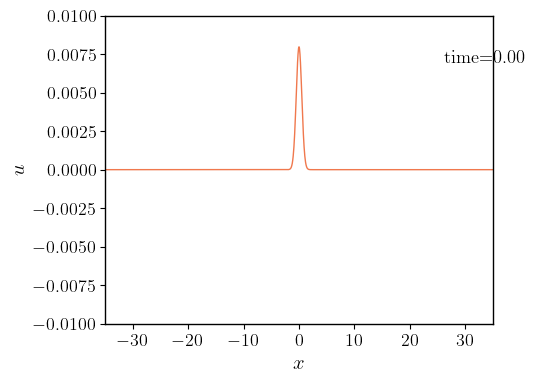

KeyboardInterrupt: 

In [29]:
address = 'Data/SimulacionData2.npz'
figData = plt.subplots(nrows=1, ncols=1, figsize=(5, 4), sharex=False, sharey=False, gridspec_kw=dict(hspace=0.0, wspace=.13))
dvideo = mod.Visualization(address, figData)

n0 = 0
dataname = '.data'
nameV = 'video_guitar2'
xmin, xmax, ls, lw, color = xi[0], xi[-1], '-', 1, '#f0784d'
struc = [xmin, xmax, ls, lw, color]

dvideo.video(n0, dataname, struc, nameV, show=True, ylim=[-.01, .01])

In [ ]:
#

In [ ]:
def guitar():
    """Triangular wave (pulled guitar string)."""
    xmax = 0.75
    x0 = 0.8*xmax
    a = 0.005
    freq = 440
    wavelength = 2*xmax
    c = freq*wavelength
    C = 1
    omega = 2*np.pi*freq
    num_periods = 2
    tmax = 2*np.pi/omega*num_periods
    # Choose dt the same as the stability limit for Nx=50
    Nx = 80 
    dt = xmax/Nx/c

    def I(x):
        Ixi = a*x/x0
        ind = x > x0
        Ixi[ind] = a/(xmax-x0)*(xmax-x[ind])
        return Ixi

    u, xi, ti, cpu_time = mod.solver(I, xmax, tmax, dt, C, c=c, ZipName='SimulacionData2')   
    return u, xi, ti, cpu_time

In [ ]:
u, xi, ti, cpu_time = guitar()

In [ ]:
address = 'Data/SimulacionData2.npz'
figData = plt.subplots(nrows=1, ncols=1, figsize=(5, 4), sharex=False, sharey=False, gridspec_kw=dict(hspace=0.0, wspace=.13))
dvideo = mod.Visualization(address, figData)

n0 = 0
dataname = '.data'
nameV = 'video_guitar'
xmin, xmax, ls, lw, color = xi[0], xi[-1], '-', 1, '#f0784d'
struc = [xmin, xmax, ls, lw, color]

dvideo.video(n0, dataname, struc, nameV, show=True, ylim=[-.01, .01])